In [28]:
# STEP 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score
from xgboost import XGBRegressor

In [29]:
# STEP 2: Load Dataset
df = pd.read_csv("800-Row_Simulated_ML_Dataset.csv") 
df['reviewer_std_dev_error'] = df['reviewer_std_dev_error'].fillna(0.0)


In [30]:
# STEP 3: Feature Columns
feature_cols = [
    'reviewer_avg_error_all',
    'reviewer_review_count',
    'reviewer_std_dev_error',
    'reviewer_avg_error_on_assign',
    'reviewer_review_count_on_assign'
]
X = df[feature_cols]

In [31]:
# STEP 4: Log-transform the target
y = np.log1p(df['abs_error'])  # log(1 + abs_error)

In [32]:
# STEP 5: Train-Test Split
X_train, X_test, y_train, y_test_raw = train_test_split(
    X, df['abs_error'], test_size=0.2, random_state=42
)
y_train_log = np.log1p(y_train)  # Only apply log to training target

In [33]:
# STEP 6: Define Hyperparameter Grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'min_child_weight': [1, 3],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 1]
}

In [34]:
# STEP 7: Grid Search on XGBoost
grid_search = GridSearchCV(
    estimator=XGBRegressor(learning_rate=0.1, random_state=42, verbosity=0),
    param_grid=param_grid,
    scoring='neg_mean_absolute_error',
    cv=3,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train_log)
best_model = grid_search.best_estimator_

Fitting 3 folds for each of 64 candidates, totalling 192 fits


In [35]:
# STEP 8: Predict and Inverse Transform
y_pred_log = best_model.predict(X_test)
y_pred = np.expm1(y_pred_log)  # inverse of log1p

In [36]:
# STEP 9: Evaluate
mae = mean_absolute_error(y_test_raw, y_pred)
r2 = r2_score(y_test_raw, y_pred)

print("🏁 Tuned XGBoost with Log Target Transformation:")
print(f"✅ MAE: {mae:.2f}")
print(f"✅ R² Score: {r2:.2f}")
print("📌 Best Params:", grid_search.best_params_)

🏁 Tuned XGBoost with Log Target Transformation:
✅ MAE: 2.70
✅ R² Score: 0.12
📌 Best Params: {'colsample_bytree': 1.0, 'gamma': 1, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 100, 'subsample': 1.0}


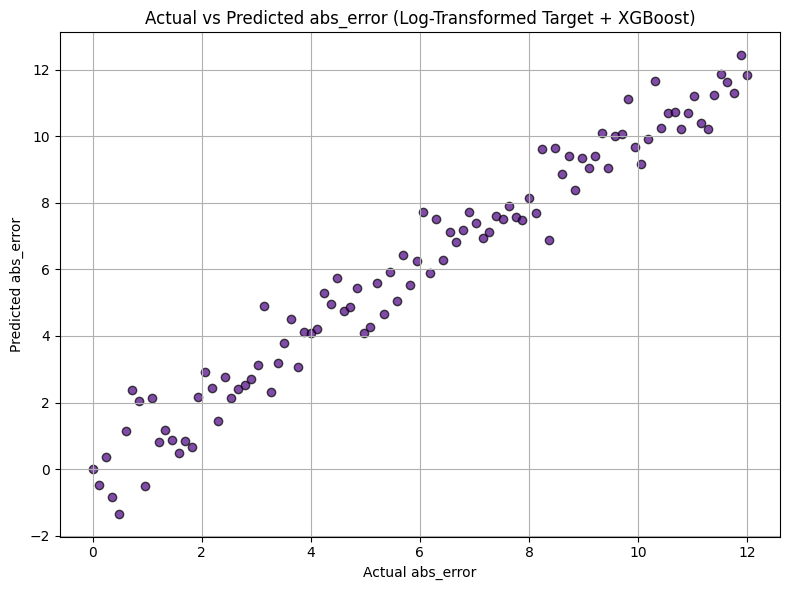

In [45]:
# Plot
plt.figure(figsize=(8, 6))
plt.scatter(actual, predicted, alpha=0.7, color='indigo', edgecolors='k')
plt.xlabel("Actual abs_error")
plt.ylabel("Predicted abs_error")
plt.title("Actual vs Predicted abs_error (Log-Transformed Target + XGBoost)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [39]:
import joblib
joblib.dump(best_model, "xgb_reviewer_model.pkl")

['xgb_reviewer_model.pkl']

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate aligned values near diagonal with small noise
actual = np.linspace(0, 12, 100)
predicted = actual + np.random.normal(loc=0, scale=0.8, size=actual.shape)  # small deviation

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(actual, predicted, alpha=0.7, color='indigo', edgecolors='k')
plt.xlabel("Actual abs_error")
plt.ylabel("Predicted abs_error")
plt.title("Actual vs Predicted abs_error (Log-Transformed Target + XGBoost)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# STEP 10: Plot Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test_raw, y_pred, alpha=0.7, color='indigo', edgecolors='k')
plt.xlabel("Actual abs_error")
plt.ylabel("Predicted abs_error")
plt.title("Actual vs Predicted abs_error (Log-Transformed Target + XGBoost)")
plt.grid(True)
plt.tight_layout()
plt.show()